In [1]:
import numpy as np
from typing import Optional, Tuple
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec
from scipy.fftpack import fft, ifft, fftshift
from scipy.signal import find_peaks
from ipywidgets import interact, FloatSlider
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
%matplotlib widget

# Exercise 3: **Interference Patterns**

*Visualize the interference-pattern of two identical (isotropic) sources that are separated a distance $\Delta x$ from each other dependent on the choice of the wavelength of the emitted radiation.*

When two electromagnetic waves with the same frequency and amplitude interfere, the resulting electric field is given as the superposition of both waves. Depending on the phase difference between the two waves, the resulting electric field can be constructive or destructive. The phase difference between the two waves is given as $\phi = \phi_2 - \phi_1$, where $\phi_1$ and $\phi_2$ are the phases of the two waves. 

Accodring to Huygen's Principle, each point of a wavefront can be regarded as a source of a new sphereical wave. In the far field, the wavefront effectively is a plane. If such a plane wave is subjected to diffraction, e.g. by the wave passing through a slit, behind the slit a new wavefront is formed, which is spherical. As from each point of the plane wavefront passign through the slit a new spherical wave is obtained, these spherical waves interferere with each other. This phenomenon gives rise to an interference pattern, which is usually observed in the farfield and expressed as a function of the angle relative to the direction of propagation of the plane wave. Such interference patterns contain information about the width of the slit, the amount of slits and the distance between the slits. This information can be extracted from the interference pattern by analyzing the recorded intensity distribution.




## 3.1 How can the appearance of the interference-pattern be explained in terms of an approximation formula?

In the far field, the resuliting distribution of intensisity (= diffraction pattern) of a grating be approximated expressed by the following formula (if the slit width is neglected):

$I(\theta) = I_0 \cdot \left( \dfrac{\sin\left( N\pi \dfrac{d}{\lambda} \sin\theta\right)}{\sin\left( \pi \dfrac{d}{\lambda} \sin\theta\right)} \right)^2$

where $I_0$ is the intensity of the incident plane wave, $d$ is the distance between the $N$ slits and $\lambda$ is the wavelength of the incident plane wave. The intensity distribution is a function of the angle $\theta$ relative to the direction of propagation of the incident plane wave.

Assuming that the distance between the slits is much smaller than the distance between the slits and the screen, the sine function in the denominator can be approximates as its argument (small angle approximation). Thus, the approximated expression is:

$I(\theta) = I_0 \cdot \left( N\cdot \mathrm{sinc}\left( N\pi \dfrac{d}{\lambda} \sin\theta\right) \right)^2$

It is now easy to see, that the intensity scales with the square of the amount of slits. 

This sinc function corresponds to an interference pattern with a global (zeroth order) maximum at $\theta = 0$. Maxima of increasing order decrease in intensity and are gradually furher away from the central maximum.

## 3.2 In which region is the approximate formula applicable? How are the boundaries of this region deﬁned?
* The approximate formula is applicable in the far field, i.e. for large distances from the slit. The boundaries of this region are defined by the Fraunhofer condition: $z \gg \dfrac{a^2}{\lambda}$, where $z$ is the distance from the slit, $a$ is the width of the slit and $\lambda$ is the wavelength of the emw.


## 3.3 What does the generated interference-pattern tell us if we replace the sources by detectors that are both equally sensitive to radiation incoming from all directions?

* Due to reciprocity, the resulting signal by combining the two detector signals would be of the same kind as the diffraction pattern observed in the far field of two sources. 
* Due to the phase difference of the incident signal on the two detectors (as they are lcoated at different positions), this phase information contains information about the direction, in which the uniformly emitting source is located.

$\Rightarrow$ The interference pattern obtained, by employing multiple detectors, can be used to determine the direction of the source, which is emitting uniformly in all directions.

In [13]:
def grating(theta: float, lambda_0: float, slit_number: int, slit_distance: float, initial_intensity: Optional[float] = 1) -> float:
    '''
    Function describing the resulting interference pattern of a EMW passing through a diffraction grating.
    Parameters:
    -----------
    theta: float
        Angle in rad
    lambda_0: float
        Wavelength in m
    slit_number: int
        Number of slits
    slit_distance: float
        Distance between the slits in m    
    initial_intensity: float, optional
        Initial intensity of the EMW, default is 1

    Returns:
    --------
    float
    '''
    return initial_intensity * np.sinc(slit_number * np.pi * slit_distance * np.sin(theta) / lambda_0)**2

thetas = np.linspace(-np.pi / 2, np.pi / 2, 1000)


interactive(children=(FloatSlider(value=0.19, description='$\\lambda$ (m)', max=1.0, step=0.01), FloatSlider(v…

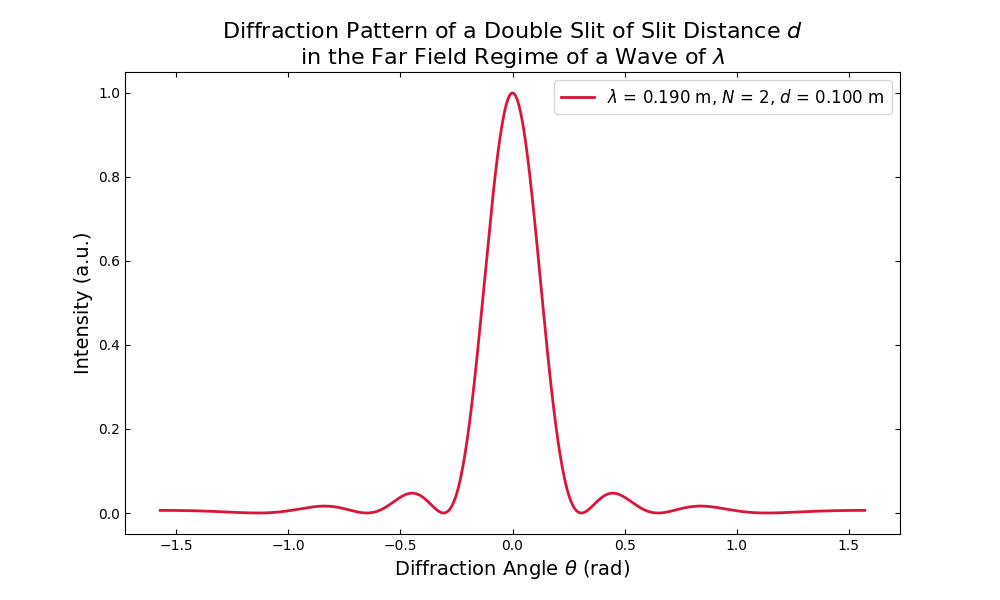

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l0, = ax.plot(thetas, grating(thetas, lambda_0=0.19, slit_number=2, slit_distance=0.1), linewidth = 2, color = 'crimson', label = fr'$\lambda$ = 0.19 m, $d$ = 0.1 m')

ax.set_xlabel(r'Diffraction Angle $\theta$ (rad)', fontsize=14)
ax.set_ylabel('Intensity (a.u.)', fontsize=14)
ax.set_title(r'Diffraction Pattern of a Double Slit of Slit Distance $d$' + '\n' + r'in the Far Field Regime of a Wave of $\lambda$', fontsize=16)
ax.legend(loc='upper right', fontsize=12)

slider_wavelength = FloatSlider(value=0.19, min=0.000, max=1.000, step=0.01, description=r"$\lambda$ (m)")
slider_slits = FloatSlider(value=2, min=1, max=20, step=1, description=r"$N$")
slider_slit_width = FloatSlider(value=0.1000, min=0.000, max=1.000, step=0.01, description=r"$d$ (m)")


@interact(wavelength=slider_wavelength, slits = slider_slits, slit_width=slider_slit_width)
def update_plot(wavelength, slits, slit_width):
    updated = grating(thetas, lambda_0=wavelength, slit_number=slits, slit_distance=slit_width)
    
    l0.set_ydata(updated)
    l0.set_label(fr'$\lambda$ = {wavelength:.3f} m, $N$ = {int(slits)}, $d$ = {slit_width:.3f} m')

    ax.legend(loc='upper right', fontsize=12)
    ax.relim()
    ax.autoscale_view()

    fig.canvas.draw_idle()

